In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
digit = keras.datasets.mnist
(X_train,y_train),( X_test, y_test) = digit.load_data()

In [3]:
class_name = ['0','1','2','3','4','5','6','7','8','9']

In [4]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

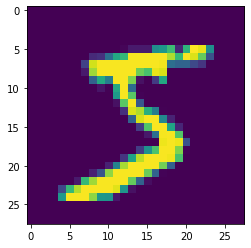

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
X_valid = X_train[:6000]
X_train = X_train[6000:]

In [10]:
y_valid = y_train[:6000]
y_train = y_train[6000:]

In [11]:
np.random.seed(45)
tf.random.set_seed(45)

In [12]:
model = tf.keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
model_history=model.fit(X_train,y_train,
                        epochs=12,
                        validation_data=(X_valid,y_valid))

Epoch 1/12
1688/1688 [==============================] - 176s 104ms/step - loss: 0.3437 - accuracy: 0.8875 - val_loss: 0.0563 - val_accuracy: 0.9845
Epoch 2/12
1688/1688 [==============================] - 176s 104ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 3/12
1688/1688 [==============================] - 176s 104ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0440 - val_accuracy: 0.9872
Epoch 4/12
1688/1688 [==============================] - 176s 104ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0324 - val_accuracy: 0.9905
Epoch 5/12
1688/1688 [==============================] - 176s 104ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 6/12
1688/1688 [==============================] - 176s 105ms/step - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0486 - val_accuracy: 0.9880
Epoch 7/12
1688/1688 [==============================] - 176s 104ms/step - loss: 0.0272 - accuracy: 0.9914 - val_

In [16]:
model.save('Model/Model.h5')

In [17]:
model = keras.models.load_model('Model/Model.h5')

In [18]:
model_history.params

{'verbose': 1, 'epochs': 12, 'steps': 1688}

In [19]:
model_history.history

{'loss': [0.16239231824874878,
  0.0588269978761673,
  0.046218547970056534,
  0.03843335434794426,
  0.03209753707051277,
  0.02642619051039219,
  0.02467823587357998,
  0.024862993508577347,
  0.0206478051841259,
  0.02023034356534481,
  0.018727799877524376,
  0.01683593913912773],
 'accuracy': [0.9484074115753174,
  0.9821296334266663,
  0.9861111044883728,
  0.9883703589439392,
  0.9905185103416443,
  0.9913148283958435,
  0.9922037124633789,
  0.9918888807296753,
  0.993481457233429,
  0.9937407374382019,
  0.9940370321273804,
  0.9945740699768066],
 'val_loss': [0.05631885305047035,
  0.04072599485516548,
  0.04401521384716034,
  0.03240367770195007,
  0.037748780101537704,
  0.048615962266922,
  0.03985045105218887,
  0.03649964556097984,
  0.04887359216809273,
  0.03476342931389809,
  0.03479848802089691,
  0.04356227442622185],
 'val_accuracy': [0.984499990940094,
  0.987500011920929,
  0.9871666431427002,
  0.9904999732971191,
  0.9884999990463257,
  0.9879999756813049,
  0.

[]

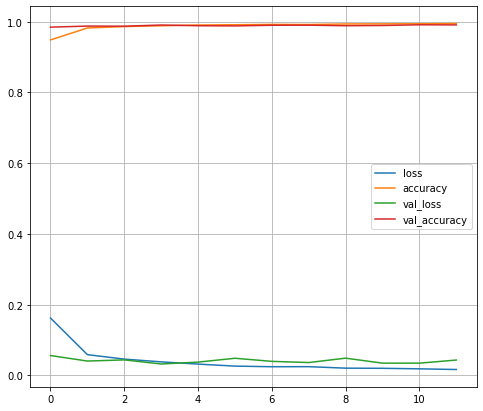

In [20]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,7))
plt.grid()
plt.plot()

In [21]:
model.evaluate(X_test,y_test, verbose=1)

313/313 [==============================] - 5s 16ms/step - loss: 0.0318 - accuracy: 0.9921


[0.031816355884075165, 0.9921000003814697]

In [22]:
X_new=X_test[:5]

In [23]:
Y_prob=model.predict(X_new)

In [24]:
Y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

AxesImage(54,36;334.8x217.44)


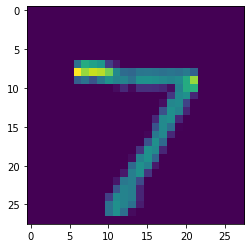

In [25]:
print(plt.imshow(X_new[0]))

AxesImage(54,36;334.8x217.44)


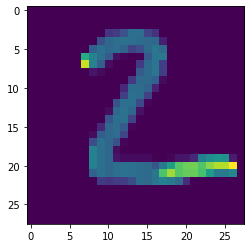

In [26]:
print(plt.imshow(X_new[1]))

AxesImage(54,36;334.8x217.44)


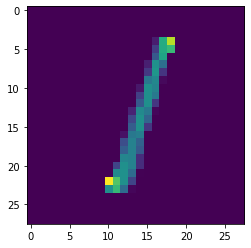

In [27]:
print(plt.imshow(X_new[2]))

AxesImage(54,36;334.8x217.44)


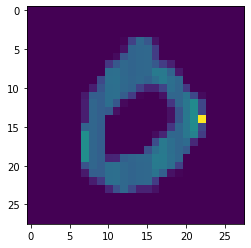

In [28]:
print(plt.imshow(X_new[3]))

AxesImage(54,36;334.8x217.44)


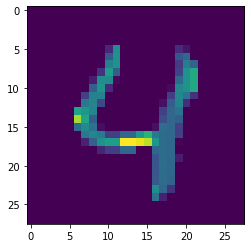

In [29]:
print(plt.imshow(X_new[4]))

In [30]:
Y_classes = Y_prob.argmax(axis = -1)
Y_classes

array([7, 2, 1, 0, 4])

# 